#### Story Generator -> 
#####     Character Generator (Public for all prompts to the image generator) (Done)
#####      Story generation as Scenes with all characters (Done)
#####      Title of the Book Generator (done )
#####       Create a Graph workflow (done)
To Do:

create a reproducilble chain for creating a image of a scene
research for TTS models
os.env

In [ ]:
users_prompt = input("Please Enter a description of what you want the story to be about: ")
from dotenv import load_dotenv
from langchain_groq import ChatGroq
from langchain_core.prompts import ChatPromptTemplate
from pydantic import BaseModel, Field
load_dotenv()

##ChatPromptTemplates
usersPromptGradingTemplate = ChatPromptTemplate.from_messages([
    ("system","You are amazing at detecting flaws, see the user's prompt and"
    "detect if the prompt has anything relevent about story generation if yes return yes else return no"),
    ("human","user's prompt:\n{users_prompt}")
])

storyCreationTemplate = ChatPromptTemplate.from_messages([
    ("system","""You are very Creative at creating a story even from a one line, take in user's prompt create a story based on what user mentioned,
     follow a structured approach ,
     first create the characters of the story with atmost details, 
     then use those Characters to create a story based on uses's prompt with 350-500 words, 
     Focus On these Points for the Story:
        - A well developed characters
        - A good Story line with some moral ending
            so from the start keep in mind that there is a moral ending so develop the story line based on that
        - Provide a Title for the Story's FrontPage
     """),
     ("human","user's prompt:\n{users_prompt}")
])

scenesCreationTemplate = ChatPromptTemplate.from_messages([
    ("system","""You are a excellent AI director, Who splits a given story into 5 well written scenes and 
     respective 5 voiceovers for the scenes,Make sure to create the scenes with well format and structure 
     because it will be given to a image generating model to generate the image for the scene also make 
     sure to not over prompt as it will make the model confused"""),
     ("human","Story:\n\nTitle:\n{title}\nCharacters:\n{character_description}\nStory:\n{story}")
])


##models
class GradeUserPrompt(BaseModel):
    """You are an intelligent AI, Our company is a story generator so we take in the user's prompt and generate a story ,therefore 
    you will see if a user's prompt is about generating a story or is it irrelevant about story generation, if yes the user's prompt is about story generation return yes else return no"""

    isStory:str = Field(description="Is user's prompt about story generation, yes or no")

class Story(BaseModel):
    """You are an creative AI, Our company is a story generator so we take in the user's prompt and generate a story, therefore for a user's provided story description,
    elaborate upon the prompt and create a story with 350-500 words maximum also generate the story's characters with detailed description from head to toe , then generate the story
    also make sure to give the story a title.
    """

    title:str = Field(description="A Great and catchy Title for the story")
    characterDescription:str = Field(description="A detailed description of characters from the story you are about to create.")
    story:str = Field(description="A story of 350-500 words with the characters you created.")

class Scenes(BaseModel):
    """You are an AI director, You take a story and create a narrative, You excel at splitting a given story into 5 different Scene and respective VoiceOver narrative for the 5 scences
    Make Sure:
        - The Scenes that you create are well written because that text will be given to a image generating model to generate the scene as image. also make sure you dont over prompt as well because the model will find it hard to follow
        - also generate the voiceovers that is relevant to the scene
        - there are cost constrains so you are to only generate 5 scenes and 5 respective voiceovers
    """
    scene1:str = Field(description="Scene 1 of the story with atmost detail for image generator")
    voiceover1:str = Field(description="Narrative for the Scene 1")

    scene2:str = Field(description="Scene 2 of the story with atmost detail for image generator")
    voiceover2:str = Field(description="Narrative for the Scene 2")

    scene3:str = Field(description="Scene 3 of the story with atmost detail for image generator")
    voiceover3:str = Field(description="Narrative for the Scene 3")

    scene4:str = Field(description="Scene 4 of the story with atmost detail for image generator")
    voiceover4:str = Field(description="Narrative for the Scene 4")

    scene5:str = Field(description="Scene 5 of the story with atmost detail for image generator")
    voiceover5:str = Field(description="Narrative for the Scene 5")

## Uses's Prompt Grading System and Story Creation System
usersPromptGrader = ChatGroq(model="llama3-70b-8192").with_structured_output(GradeUserPrompt)
usersPromptGradingChain = usersPromptGradingTemplate | usersPromptGrader
usersPromptGrade = usersPromptGradingChain.invoke({"users_prompt":users_prompt})

if usersPromptGrade.isStory.strip().lower() == "yes":
    #Story Creating System
    storyCreator = ChatGroq(model="llama3-70b-8192").with_structured_output(Story)
    storyCreationChain = storyCreationTemplate | storyCreator
    story = storyCreationChain.invoke({"users_prompt":users_prompt})

    ## Scene Creation System
    scenesCreator = ChatGroq(model="llama3-70b-8192").with_structured_output(Scenes)
    scenesCreationChain = scenesCreationTemplate | scenesCreator
    scenes = scenesCreationChain.invoke({"character_description":story.characterDescription,
                                         "story":story.story,
                                         "title":story.title})
    

else:
    print("please enter a brief description about your story for a quality story")






In [54]:
story

Story(title='A Bridge Between Two Worlds', characterDescription='Rohan, a 25-year-old Indian software engineer, with short black hair and brown eyes, wearing a traditional Indian kurta and jeans. He has a strong sense of curiosity and adventure. On the other hand, Emily, a 28-year-old American journalist, with long blonde hair and blue eyes, wearing a casual American outfit. She is confident and determined. Rohan and Emily meet at a cultural exchange program in New York City.', story="Title: A Bridge Between Two Worlds\n\nRohan, a young Indian software engineer, had always been fascinated by the American culture. He jumped at the opportunity to participate in a cultural exchange program in New York City. Meanwhile, Emily, a determined American journalist, was covering the program, eager to learn about the Indian perspective. Their paths crossed at a traditional Indian dinner, where Rohan was introducing the guests to the intricacies of Indian cuisine. Emily was impressed by Rohan's war

In [ ]:
from gradio_client import Client
from dotenv import load_dotenv
load_dotenv()
import os
client = Client("black-forest-labs/FLUX.1-Schnell",hf_token=os.getenv("HF_TOKEN"))
client.view_api


Loaded as API: https://black-forest-labs-flux-1-schnell.hf.space ✔


<bound method Client.view_api of Client.predict() Usage Info
---------------------------
Named API endpoints: 1

 - predict(prompt, seed, randomize_seed, width, height, num_inference_steps, api_name="/infer") -> (result, seed)
    Parameters:
     - [Textbox] prompt: str (required)  
     - [Slider] seed: float (not required, defaults to:   0)  (numeric value between 0 and 2147483647) 
     - [Checkbox] randomize_seed: bool (not required, defaults to:   True)  
     - [Slider] width: float (not required, defaults to:   1024)  (numeric value between 256 and 2048) 
     - [Slider] height: float (not required, defaults to:   1024)  (numeric value between 256 and 2048) 
     - [Slider] num_inference_steps: float (not required, defaults to:   4)  (numeric value between 1 and 50) 
    Returns:
     - [Image] result: filepath 
     - [Slider] seed: float (numeric value between 0 and 2147483647) 
>

In [55]:

prompt = f"""{story.characterDescription}\n\n{story.story}\n\
    Create a Title page of the Book for this story book,
    - Anywhere in the image place this title : '{story.title}'  
    -Make Sure Texts you create in the image is accurate and not a gibberish so focus more on that
    -Dont Explicitly name things like 'Title of the book' near the title 
    """
 

In [53]:
prompt

NameError: name 'prompt' is not defined

In [5]:
from PIL import Image
filepath = client.predict(
    prompt = "Create a image having a Crow and Goose",
    randomize_seed=True,
    num_inference_steps = 10
)
image = Image.open(filepath[0])
image.save("Titleofthebook.png")

In [6]:
import uuid

from typing import TypedDict,List , NotRequired
from langgraph.graph import END,StateGraph
from langchain_core.prompts import PromptTemplate
from storygenerator.schemas import Story,Scenes
from storygenerator.chains import scenesCreationChain,storyCreationChain,usersPromptGradingChain
from storygenerator.imagegenerator import generateImage

## State of the Graph
class BookState(TypedDict):
    users_prompt : str
    story: NotRequired[Story]
    scenes: NotRequired[Scenes]
    grade: NotRequired[str]
    users_id : NotRequired[int]

##templates
titleImageGenerationTemplate = PromptTemplate.from_template("""
{character_description}\n\n{story}\n\
    Create a Title page of the Book for this story book,
    - Anywhere in the image place this title : '{title}'  
    -Make Sure Texts you create in the image is accurate and not a gibberish so focus more on that
    -Dont Explicitly name things like 'Title of the book' near the title 
""") 

## Nodes
def usersPrompt(state:BookState) -> BookState:
    grade = usersPromptGradingChain.invoke({"users_prompt":state["users_prompt"]})
    return {
            "users_prompt":state["users_prompt"],
            "grade" : grade.isStory.strip().lower()
        }

def gradeThePrompt(state):
    if (state["grade"]=="no"):
        print("Ending the Graph... , User's request is Not Valid")
        return END
    else:
        print("Entering Story Creation Node...")
        return "storycreator"
    
def storyCreator(state:BookState) -> BookState:
    story = storyCreationChain.invoke({"users_prompt":state["users_prompt"]})
    print("Story Created ...")
    print("Entering Title Image Creation Node...")
    return {"users_prompt":state["users_prompt"],"grade" : state["grade"],"story":story,"users_id":uuid.uuid4()}

def titleImageCreator(state:BookState) -> BookState:
    story = state["story"]
    prompt = titleImageGenerationTemplate.format(**{"character_description":story.characterDescription,"story":story.story,"title":story.title})
    generateImage(prompt, f"stories/{state['users_id']}","title.png")
    print("Created a Title Image....")
    return state








graph = StateGraph(BookState)

graph.add_node("usersprompt",usersPrompt)
graph.add_node("storycreator",storyCreator)
graph.add_node("titleimagecreator",titleImageCreator)

graph.set_entry_point("usersprompt")
graph.add_conditional_edges("usersprompt",gradeThePrompt,[END,"storycreator"])
graph.add_edge("storycreator","titleimagecreator")
graph.add_edge("storycreator",END)

app = graph.compile()



Loaded as API: https://black-forest-labs-flux-1-schnell.hf.space ✔


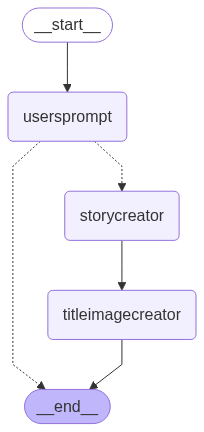

In [7]:
from IPython.display import Image, display
from langchain_core.runnables.graph import MermaidDrawMethod

display(
    Image(
        app.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API
        )
    )
)

In [8]:
book = app.invoke({"users_prompt":"Create a Story based on a Mother and Her Children"})

Entering Story Creation Node...
Story Created ...
Entering Title Image Creation Node...
Created a Title Image....


In [33]:
book["story"]

Story(title="A Mother's Love", characterDescription='The story revolves around a loving mother, Maya, who is in her mid-30s. She has long, curly brown hair and warm, hazel eyes that sparkle with kindness. She wears a gentle smile on her face, which puts everyone at ease. Maya is a devoted mother to her three children: Akira, a 10-year-old boy with a mischievous grin and an adventurous spirit; Leela, a 7-year-old girl with a wild imagination and a love for storytelling; and baby Kaito, a 2-year-old ball of energy who is always getting into trouble.\n', story="Title: A Mother's Love\n\nMaya lived for her children. She had sacrificed her career to raise them, and it was a decision she never regretted. One sunny afternoon, as they were playing in the backyard, Akira stumbled upon an old, mysterious-looking box buried beneath the swings. As they gathered around, Leela's eyes sparkled with excitement, and Kaito babbled in anticipation. Maya, sensing their curiosity, nodded, and together, the